# <a id='toc1_'></a>[Quantum Chemistry Calculations (Hartree fock, post Hartree fock and DFT method)](#toc0_)

1. **Theodore GOUMAI VEDEKOI**, theodore.goumai@facscieces-uy1.cm
    * Atomic, Molecular et Biophysical physics, Université of Yaoundé I

       
April 2025

# INTRODUCTION

***Thiophene*** is an organosulfur molecule consisting of a five-membered ring with four carbon atoms and one sulfur atom. It is an aromatic compound widely studied in organic chemistry due to its interesting properties and diverse applications. In this notebook, we will explore the properties of thiophene using RDKit and PySCF tools for HF, DFT, and post-HF calculations.

# Thiophene molecule presentation

### Description


Thiophene molecule [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/Thiophene)
* **Molecular Formula** : `C4H4S`
* **PubChem Cid** : `8030`
* **IUPAC Name** : `Thiophene`
* **Molecular mass** : `84,14 g/mol`
* **Isometric SMILES** : `C1=CSC=C1`

Thiophene is a heterocyclic organic molecule consisting of a five-membered ring, comprising four carbon atoms and one sulfur atom. Its chemical formula is C4H4S.

Structurally, thiophene can be represented as a planar ring with a sulfur atom alternating with the carbon atoms. This alternation creates conjugation of the double bonds throughout the ring.

Thiophene exhibits aromatic properties due to the delocalization of $\pi$ electrons in the ring, which confers particular ***stability***. It is often compared to benzene, but with a sulfur atom replacing one of the carbon atoms, slightly altering its chemical and physical properties.

Due to the polarity induced by sulfur, thiophene can interact uniquely with other molecules and solvents, providing opportunities for applications in various fields such as ***pharmaceuticals, conductive materials, and industrial chemistry***.




## Interest

Thiophene is a molecule of interest in various fields of chemistry and biology due to its unique properties. Here are some of the interests associated with this molecule:

* Organic Chemistry: Thiophene is used as a structural motif in the development of many organic compounds. Its presence often imparts specific properties to molecules, such as biological activities or specific interactions with other molecules.

* Pharmacology: Many thiophene-derived compounds have shown interesting pharmacological activities. Some of them are used as drugs or are studied for their therapeutic potential in treating various diseases, such as cancer, bacterial infections, or neurodegenerative disorders.

* Agriculture: Some thiophene derivatives are used in agriculture as crop protection agents. These compounds can have fungicidal or insecticidal properties, helping to prevent plant diseases and infestations of harmful insects.

* Materials Chemistry: Thiophene and its derivatives are also used in the synthesis of polymer materials. These polymers can exhibit interesting properties, such as electrical conductivity or light-absorbing capability, making them useful in applications such as solar cells, sensors, or electronic devices.


# Properties Presentation of Thiophene molecule using `RDkit`

## RDKit

![rdkit](rdkit.png)

***RDKit*** is an open-source cheminformatics toolkit designed for the manipulation and analysis of chemical information. It provides a wide range of functionalities, including molecular manipulation, cheminformatics calculations, and visualization tools. RDKit is widely used in drug discovery, computational chemistry, and bioinformatics, enabling researchers to efficiently handle chemical data and perform complex analyses.

Key features of RDKit include:

* Molecular Representation: Support for various formats such as SMILES, InChI, and SDF.
* Substructure Search: Efficient searching and matching of molecular substructures.
* Descriptors and Fingerprints: Calculation of molecular descriptors and generation of molecular fingerprints for compound similarity analysis.
* Visualization: Tools for visualizing molecular structures and properties.

RDKit is compatible with Python and C++, making it a versatile choice for integration into larger workflows and applications. Its active community and extensive documentation further enhance its usability for researchers and developers in the field.

#### **`RDKit` creation of molecular object**

In [1]:
# import of rdkit package
try:
    import rdkit
except:
    !pip install rdkit
    import rdkit

import time
from rdkit import Chem
from rdkit.Chem import Descriptors
print(rdkit.__version__)

2024.09.6


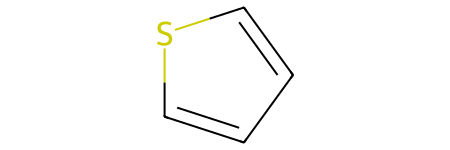

In [2]:
# Convert SMILES to RDKit-Mol object
smiles = "C1=CSC=C1"  # https://pubchem.ncbi.nlm.nih.gov/compound/Thiophene
smi_key = 'Thiophene'

# Define molecule from SMILES chain
mol_rdkit = Chem.MolFromSmiles(smiles)
mol_rdkit


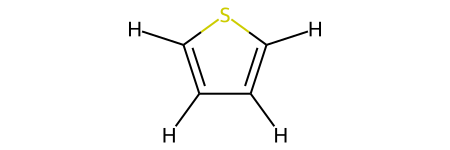

In [3]:
# add hydrogen atoms
mol_rdkit = Chem.AddHs(mol_rdkit)
mol_rdkit

### Physicochemical properties

In [4]:
import os
try:
    import pandas as pd
except:
    !pip install pandas==2.2.1
    import pandas as pd

print(pd.__version__)

2.2.1


In [5]:
# Descriptor Calculations
properties = ['Poids_Mol','poids_mol_moy', 'LogP', 'TPSA','hbd','hba']


# molecular weight
molwt = Descriptors.MolWt(mol_rdkit)
# average molecular weight
molwtE = Descriptors.ExactMolWt(mol_rdkit)
# solubility
logp = Descriptors.MolLogP(mol_rdkit)
#polarity
tpsa = Descriptors.TPSA(mol_rdkit)
# number of hydrogen bond donors
hbd = Descriptors.NumHDonors(mol_rdkit)
# number of hydrogen bond aceptors
hba = Descriptors.NumHAcceptors(mol_rdkit)

# add properties to list
data=[molwt , molwtE, logp, tpsa,hbd,hba]
data1=[84.14  ,84.00337130  ,1.81, 41.1 ,0,1] # https://pubchem.ncbi.nlm.nih.gov/#query=Thiophene

# dataframe construction
df_HF = pd.DataFrame({"properties ":properties, 
                      'valeurs':data,
                      "valeurs_pupchem":data1})
df_HF.set_index("properties ", inplace=True)### <a id='toc1_3_'></a>[CONSIGNE](#toc0_)

df_HF

,valeurs,valeurs_pupchem
properties,,
Poids_Mol,84.143000,84.140000
poids_mol_moy,84.003371,84.003371
LogP,1.748100,1.810000
TPSA,0.000000,41.100000
hbd,0.000000,0.000000
hba,1.000000,1.000000


The information present in the Pandas DataFrame is:

* ***Molecular_Weight***: This is the molecular weight of the molecule, expressed in grams per mole (g/mol). The total mass of the molecule is 84.14 g/mol, which is equivalent to that estimated by PubChem at 84.14 g/mol.

* ***Average_Molecular_Weight***: This is the average molecular weight, calculated by taking into account the isotopic distribution of the atoms. The value is 84.00337130 g/mol, which is slightly different from the nominal molecular weight.

* ***LogP***: This is the octanol/water partition coefficient (logP) of the molecule. A logP value of 1.81 suggests a slight hydrophobicity (the tendency of a substance to repel or avoid water) for the molecule, indicating its ability to cross biological membranes.

* ***TPSA***: This is the total polar surface area (TPSA) of the molecule, expressed in Å² (square angstroms). It is a measure of the surface of the molecule that is polar and capable of interactions with polar solvents. Its value here is 41.1 Å².

* ***Hbd***: This is the number of hydrogen bond donors in the molecule. It counts the number of hydrogen atoms bonded to oxygen, nitrogen, or sulfur atoms, which can form hydrogen bonds. In the case of the thiophene molecule, the hydrogen atoms are only bonded to carbon atoms, so the hbd value is 0.

* ***Hba***: This is the number of hydrogen bond acceptors in the molecule. It counts the number of oxygen, nitrogen, or sulfur atoms in the molecule that can accept hydrogen bonds. In our molecule, there is only one sulfur atom, hence the hba value is 1.


## 3D Structure with Pyscf

![rdkit](pyscf.png)

***PySCF*** (Python for Strongly Correlated Electron Systems) is a powerful open-source software package designed for quantum chemistry calculations. It is particularly well-suited for studying electronic structures and properties of molecules and periodic systems. PySCF provides a flexible and user-friendly interface for performing a wide range of calculations, making it a popular choice among researchers in computational chemistry.

Key Features:

* Modular Design: PySCF is built with a modular architecture, allowing users to easily extend its functionality or customize specific modules to meet their research needs.

* Quantum Chemical Methods: It supports various quantum chemical methods, including:
        * Hartree-Fock (HF)
        * Density Functional Theory (DFT)
        * Møller-Plesset Perturbation Theory (MP2)
        * Coupled Cluster (CC)
        * Configuration Interaction (CI)

* Support for Correlation Effects: PySCF is particularly effective for modeling strongly correlated electron systems, making it valuable for studying phenomena like magnetism and superconductivity.

* Solvation Models: The package includes capabilities for modeling solvation effects using implicit solvation models, which are essential for understanding molecular behavior in solution.

* Parallel Computing: PySCF supports parallel execution, allowing for efficient computations on large molecular systems.


In [6]:
try:
    import pyscf
except:
    !pip install pyscf
    import pyscf
print(pyscf.__version__)

2.8.0


In [7]:
with open('thiophene.txt', 'r') as file: # https://github.com/nutjunkie/IQmol/blob/master/share/fragments/Molecules/Heteroaromatics/Thiophene.xyz
    next(file)  # first line
    next(file)  # second line

    contenu = file.read()
    print(contenu)

  C      1.2268      0.1466      0.0000
  C      0.9199     -1.1842      0.0000
  C     -0.4978     -1.4144      0.0000
  C     -1.2102     -0.2491      0.0000
  S     -0.1848      1.1378      0.0000
  H      2.2310      0.5665      0.0000
  H      1.6489     -1.9946      0.0000
  H     -0.9332     -2.4137      0.0000
  H     -2.2956     -0.1685      0.0000



In [8]:
try:
    import py3Dmol
except:
    !pip install py3Dmol

from pyscf import gto

In [9]:
mol = gto.M(
    atom=contenu, 
    basis="cc-pVDZ", # choix de la base 
    verbose=4,
    charge=0,      # 0 par défaut
    spin=0,        # 0 par défaut, défini comme (n_up - n_down)
    symmetry=True, # False par défaut
)

mol.build()


System: uname_result(system='Linux', node='fredy-HP-ProBook-x360-11-G1-EE', release='6.8.0-58-generic', version='#60~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Mar 28 16:09:21 UTC 2', machine='x86_64')  Threads 4
Python 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
numpy 1.26.3  scipy 1.15.2  h5py 3.13.0
Date: Tue Apr 29 14:35:35 2025
PySCF version 2.8.0
PySCF path  /home/fredy/miniconda3/envs/phy_4268/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 9
[INPUT] num. electrons = 44
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      1.226800000000   0.146600000000   0.000000000000 AA    2.318316009616   0.277033849861   0.000000000000 Bohr   0.0
[INPUT]  2 C      0.919900000000  -1.184200000000   0.000000000000 

## 3D representation

In [10]:
xyz_view = py3Dmol.view(width=300,height=300)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}})
xyz_view.zoomTo()
xyz_view.show()



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Extraction of properties

In [11]:
print(f'The total number of electrons is {mol.nelectron} and the total number of electrons (alpha, béta) is {mol.nelec}')
print(f'The number of atomic orbitals in the {mol.basis} basis, is {mol.nao_nr()}')
print(f'The nuclear energy is {mol.energy_nuc()} Hartrees')

The total number of electrons is 44 and the total number of electrons (alpha, béta) is (22, 22)
The number of atomic orbitals in the cc-pVDZ basis, is 94
The nuclear energy is 202.02837448880913 Hartrees


# Hartree Fock and DFT Calculations

- ## **Hatree Fock** calculation

#### <a id='toc1_4_2_'></a>[Mean-field (mf) object creation with (`scf.RHF(Restricted Hartree – Fock)`)](#toc0_)

In [12]:
from pyscf import scf

mf = scf.RHF(mol) # Create a PySCF HF mean-field object
mf.x2c().density_fit() # To speed up calculations
mf.kernel()



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmphftoxqho
max_memory 4000 MB (current use 208 MB)
Freeze 0 electrons in irreps []
    44 free electrons in irreps A' A"
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -552.675417259048
HOMO (A") = -0.209046814314048  LUMO (A") = 0.0422897016538594
cycle= 1 E= -551.263381273685  delta_E= 1.41  |g|= 0.364  |ddm|= 2.95
HOMO (A") = -0.358283921854622  LUMO (A") = 0.0984112891236382
cycle= 2 E= -551.313552490765  delta_E= -0.0502  |g|= 0.136  |ddm|= 0.493
HOMO (A") = -0.315604264855822  LUMO (A") = 0.132127103863037
cycle= 3 E= -551.319124531628  delta_E= -0.00557  |g|= 0.0574  |ddm|= 0.1

-551.3204186296965

* ## **DFT Calculation**

Density Functional Theory (DFT) is a widely used computational quantum mechanical modeling method employed to investigate the electronic structure of many-body systems, particularly atoms, molecules, and solids. Unlike traditional methods that rely on wave functions, DFT simplifies calculations by using electron density as the central variable.

DFT employs exchange-correlation functionals to approximate the energy of a system. These functionals are critical as they encapsulate complex many-body interactions. Different functionals can yield varying results, making the choice of functional crucial for accuracy.

## ***Note***

Here, we perform calculations for different functionals in order to identify the one that best fits our molecule.
The different functionals are **B3LYP**, **B3PW91**, **BLYP**, **B1B95**


### For B3LYP functional

In [13]:
# Initialize the dictionary to store the energies and reference values
from pyscf import dft

start = time.time()
mdf_1=dft.RKS(mol, xc="B3LYP").kernel() 
mdf_time_1 = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpoabqarxl
max_memory 4000 MB (current use 296 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3LYP
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x791870f11630>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <fu

/home/fredy/miniconda3/envs/phy_4268/lib/python3.10/site-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


tot grids = 114584
init E= -553.811235114916
HOMO (A") = -0.274489078244761  LUMO (A") = -0.0828366386883108
cycle= 1 E= -553.000485040261  delta_E= 0.811  |g|= 0.329  |ddm|= 3.16
HOMO (A") = -0.186944382251106  LUMO (A") = 0.0276007472174401
cycle= 2 E= -552.965101902996  delta_E= 0.0354  |g|= 0.479  |ddm|= 0.803
HOMO (A") = -0.234090276067281  LUMO (A") = -0.00700485457680274
cycle= 3 E= -553.029788574697  delta_E= -0.0647  |g|= 0.0781  |ddm|= 0.561
HOMO (A") = -0.240425782999859  LUMO (A") = -0.0143680880853817
cycle= 4 E= -553.031569088057  delta_E= -0.00178  |g|= 0.0278  |ddm|= 0.113
HOMO (A") = -0.238054945842212  LUMO (A") = -0.0125389300366247
cycle= 5 E= -553.031759124066  delta_E= -0.00019  |g|= 0.00876  |ddm|= 0.0288
HOMO (A") = -0.238361182461754  LUMO (A") = -0.0124240075046416
cycle= 6 E= -553.031779215269  delta_E= -2.01e-05  |g|= 0.00217  |ddm|= 0.00934
HOMO (A") = -0.238336674973538  LUMO (A") = -0.0124464239893183
cycle= 7 E= -553.031780453042  delta_E= -1.24e-06  |g|

### For B3PW91 functional

In [14]:
start = time.time()
mdf_2=dft.RKS(mol, xc="B3PW91").kernel() 
mdf_time_2 = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpabns6y_e
max_memory 4000 MB (current use 334 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3PW91
    A. D. Becke.,  J. Chem. Phys. 98, 5648 (1993)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x791870f11630>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x791870edfd00>

### For B1B95 functional

In [15]:
start = time.time()
mdf_3=dft.RKS(mol, xc="B1B95").kernel() 
mdf_time_3 = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp8jf2ryht
max_memory 4000 MB (current use 335 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B1B95
    A. D. Becke.,  J. Chem. Phys. 104, 1040 (1996)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x791870f11630>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x791870edfd00>

### For BLYP functional

In [16]:
start = time.time()
mdf_4=dft.RKS(mol, xc="BLYP").kernel() 
mdf_time_4 = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpek4m3042
max_memory 4000 MB (current use 218 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = BLYP
    A. D. Becke.,  Phys. Rev. A 38, 3098 (1988)
    C. Lee, W. Yang, and R. G. Parr.,  Phys. Rev. B 37, 785 (1988)
    B. Miehlich, A. Savin, H. Stoll, and H. Preuss.,  Chem. Phys. Lett. 157, 200 (1989)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune

In [17]:
mf_times = [mdf_time_1, mdf_time_2, mdf_time_3, mdf_time_4]
energies = [mdf_1,mdf_2,mdf_3,mdf_4]
ref_energies=[-553.0325426,-552.9273649,-552.9399380,-552.9970779]
ecart_energies=[(mdf_1 + 553.0325426)*627.5095,(mdf_2 + 552.9273649)*627.5095,(mdf_3 + 552.9399380)*627.5095,(mdf_4 + 552.9970779)*627.5095]

In [18]:
# Create the results dataframe
import pandas as pd
# Define the calculation methods
fonc = ['B3LYP', 'B3PW91', 'BLYP', 'B1B95']
df_HF = pd.DataFrame({"Fonctionnelle":fonc, 
                      'Total energy':energies,
                      "Reference energy":ref_energies,
                      "ecart_ref_tot(kcal/mol)":ecart_energies,
                      "Time":mf_times})

df_HF

,Fonctionnelle,Total energy,Reference energy,ecart_ref_tot(kcal/mol),Time
0,B3LYP,-553.031780,-553.032543,0.478252,20.508527
1,B3PW91,-552.926715,-552.927365,0.407913,19.445804
2,BLYP,-552.994959,-552.939938,-34.525896,27.774679
3,B1B95,-552.937854,-552.997078,37.163774,26.157890


## Comparison of functionals

Among the functionals studied, **BLYP and B3PW91 offer the best accuracy with a zero deviation** from the reference energy (https://cccbdb.nist.gov/bseenergy2x.asp). However, **B1B95 is the slowest in terms of computation time**, while B3PW91 is faster, making it an optimal choice. **B3LYP stands out for its speed while maintaining a low deviation**, making it a good compromise between accuracy and performance. In contrast, B1B95 is the least efficient, showing a significant deviation despite a reasonable computation time. Thus, **BLYP appears to be the best option, combining accuracy and speed**.


# Post Hartree-Fock calculations

#### <a id='toc1_1_'></a>[MF calculations (mean field)](#toc0_)

In [19]:
import time
from pyscf import scf

start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start 



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmphb180sky
max_memory 4000 MB (current use 199 MB)
Freeze 0 electrons in irreps []
    44 free electrons in irreps A' A"
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -552.675417259048
HOMO (A") = -0.209046814314047  LUMO (A") = 0.0422897016538613
cycle= 1 E= -551.263381273685  delta_E= 1.41  |g|= 0.364  |ddm|= 2.95
HOMO (A") = -0.358283921854616  LUMO (A") = 0.0984112891236653
cycle= 2 E= -551.313552490764  delta_E= -0.0502  |g|= 0.136  |ddm|= 0.493
HOMO (A") = -0.315604264855822  LUMO (A") = 0.132127103863047
cycle= 3 E= -551.319124531628  delta_E= -0.00557  |g|= 0.0574  |ddm|= 0.1

#### <a id='toc1_1_'></a>[MP2 calculations (Møller-Plesset)](#toc0_)

The [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory) performs perturbative corrections to the Hartree-Fock approximation.

In [20]:
from pyscf import mp
start = time.time()
mymp2 = mp.MP2(myhf).run()
mymp2_time = time.time() - start
energie1=mymp2.e_tot
print(energie1)


******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 22, nmo = 94
max_memory 4000 MB (current use 289 MB)
E(MP2) = -552.000053108681  E_corr = -0.679634478982432
E(SCS-MP2) = -551.97916340324  E_corr = -0.658744773541605
E_corr(same-spin) = -0.180942232196901
E_corr(oppo-spin) = -0.498692246785532
-552.000053108681



























* `E(MP2)` is the total energy calculated using the `MP2` method. This energy includes both the electron-electron energy from `Hartree-Fock (HF)` and the second-order electronic correlation correction `(MP2)`. The negative value indicates that the molecular system is bound and stable.

* `E_corr` is the electronic correlation correction calculated using the `MP2` method. It represents the difference between the total energy calculated with `MP2` and the electron-electron energy calculated with `HF`. The negative value indicates that the electronic correlation correction is stabilizing, meaning it improves the `HF` approximation by accounting for additional electronic correlation effects.

* `E(SCS-MP2)` is the total energy calculated using the `SCS-MP2` method. `SCS-MP2` is a modified version of `MP2` that uses specific scaling coefficients to improve the description of electronic correlation. The negative value indicates that the molecular system is bound and stable.

* `E_corr` is the electronic correlation correction calculated using the `SCS-MP2` method. It represents the difference between the total energy calculated with `SCS-MP2` and the electron-electron energy calculated with `HF`. As with `MP2`, the negative value indicates that the electronic correlation correction is stabilizing.

#### <a id='toc1_1_'></a>[CC and CCSD calculations (Coupled Cluster)](#toc0_)

The [CC(Coupled_cluster)](https://en.wikipedia.org/wiki/Coupled_cluster) is a perturbative method that improves the Hartree-Fock approximation.

The [CCSD(Coupled_cluster Single and Double)](https://manual.q-chem.com/5.2/Ch6.S8.SS1.html) is a powerful method for modeling electronic interactions in molecules, offering a good balance between accuracy and computational cost.

In [21]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start
energie2=mycc.e_tot
print(energie2)


******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 22, nmo = 94
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 290 MB)
Init t2, MP2 energy = -552.000053058122  E_corr(MP2) -0.679634428423394
Init E_corr(CCSD) = -0.67963442842834
cycle = 1  E_corr(CCSD) = -0.687274847780076  dE = -0.00764041935  norm(t1,t2) = 0.0714046
cycle = 2  E_corr(CCSD) = -0.707421064295967  dE = -0.0201462165  norm(t1,t2) = 0.0246233
cycle = 3  E_corr(CCSD) = -0.708606481817335  dE = -0.00118541752  norm(t1,t2) = 0.0113657
cycle = 4  E_corr(CCSD) = -0.711487966631447  dE = -0.00288148481  norm(t1,t2) = 0.00502925
cycle = 5  E_corr(CCSD) = -0.711621038405086  dE = -0.000133071774  norm(t1,t2) = 0.0014509
cycle = 6  E_corr(CCSD) = -0.711407602645424  dE = 0.00021343576  norm(t1,t2) = 0.000523901
cycle = 7  E_corr(CCSD) = -0.711406874275878  dE = 7.28369546e-07  norm(t1,t2) = 0.00024

* `E_corr` represents the difference between the total energy calculated with `CCSD` and the electron-electron energy calculated with `HF`. The negative value indicates that the electronic correlation correction is stabilizing, meaning it improves the `HF` approximation by accounting for additional electronic correlation effects

#### <a id='toc1_1_'></a>[ CCSD(T) calculation with CCSD](#toc0_)

In [22]:
start = time.time()
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start

CCSD(T) correction = -0.0309257534171747


In [23]:
mf_times = [myhf_time, mymp2_time, mycc_time, mycct_time]
energies = [myhf.e_tot,energie1,energie2,energie2+e_ccsd_t]
ref_energies=[-552.9399380,-551.9840701,-552.0136349,-552.0434478]
ecart_energies=[(myhf.e_tot + 552.9399380)*627.5095,(energie1 + 551.9840701)*627.5095,(energie2 + 552.0136349)*627.5095,(energie2+e_ccsd_t + 552.0434478)*627.5095]

In [24]:
# Create the results dataframe
import pandas as pd
# Define the calculation methods
methods = ['HF', 'MP2', 'CCSD', 'CCSD(T)']
df_HF = pd.DataFrame({"Methodes":methods, 
                      'Total energy':energies,
                      "Reference energy":ref_energies,
                      "ecart_ref_tot(kcal/mol)":ecart_energies,
                      "Time":mf_times})

df_HF

,Methodes,Total energy,Reference energy,ecart_ref_tot(kcal/mol),Time
0,HF,-551.320419,-552.939938,1016.263790,5.764056
1,MP2,-552.000053,-551.984070,-10.029490,1.198997
2,CCSD,-552.031834,-552.013635,-11.420027,110.415954
3,CCSD(T),-552.062760,-552.043448,-12.118353,63.940530


In [25]:
basis_sets = [
    "STO-3G",           # Simple zeta, minimal basis
    "3-21G",            # Double zeta with 3 Gaussian primitives
    "6-31G",            # Double zeta with 6 Gaussian primitives
    "6-31G*",           # Double zeta with 6 Gaussian primitives
    "6-31G(d,p)",       # Polarization functions (+ 5 d-orbitals for all atoms except H, +3 p-orbitals for H atoms) added
    "6-311G(d,p)",      # Triple zeta with polarization functions
    "6-311+G(d,p)",     # Triple zeta with polarization functions and diffuse functions
    "cc-pvqz",          # Quadruple zeta
    "cc-pv5z",          # Quintuple zeta
    "def2-SVP",         # Double zeta with polarization functions
    "def2-SVPD",        # Double zeta with polarization functions and diffuse functions
    "def2-TZVP",        # Triple zeta with polarization functions
    "def2-TZVPD",       # Triple zeta with polarization functions and diffuse functions
    "def2-TZVPP",       # Triple zeta with polarization functions and diffuse functions
    "def2-TZVPPD",      # Triple zeta with polarization functions, diffuse functions, and d functions
    "def2-QZVP",        # Quadruple zeta with polarization functions
    "def2-QZVPP",       # Quadruple zeta with polarization functions and diffuse functions
    "def2-QZVPPD",      # Quadruple zeta with polarization functions, diffuse functions, and d functions
    "def2-QZVPD",       # Quadruple zeta with polarization functions and diffuse functions
    "def2-QZVPPD"       # Quadruple zeta with polarization functions, diffuse functions, and d functions
    ]

In [26]:
mol_list = []
for i in basis_sets:
    mol = gto.M(
        atom=contenu, 
        basis=i, # choix de la base 
        verbose=4,
        charge=0,      # 0 par défaut
        spin=0,        # 0 par défaut, défini comme (n_up - n_down)
        symmetry=True, # False par défaut
    )

    mol_list.append(mol.build())
mol_list

System: uname_result(system='Linux', node='fredy-HP-ProBook-x360-11-G1-EE', release='6.8.0-58-generic', version='#60~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Mar 28 16:09:21 UTC 2', machine='x86_64')  Threads 4
Python 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
numpy 1.26.3  scipy 1.15.2  h5py 3.13.0
Date: Tue Apr 29 14:40:19 2025
PySCF version 2.8.0
PySCF path  /home/fredy/miniconda3/envs/phy_4268/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 9
[INPUT] num. electrons = 44
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      1.226800000000   0.146600000000   0.000000000000 AA    2.318316009616   0.277033849861   0.000000000000 Bohr   0.0
[INPUT]  2 C      0.919900000000  -1.184200000000   0.000000000000 

In [ ]:
mf_list = []
for mol in mol_list:
    mf = scf.RHF(mol) # Create a PySCF HF mean-field object
    mf.x2c().density_fit() # To speed up calculations
    mf_list.append(mf.kernel())
mf_list



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpzjdrov69
max_memory 4000 MB (current use 551 MB)
Freeze 0 electrons in irreps []
    44 free electrons in irreps A' A"
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -546.289839372711
HOMO (A") = -0.14952046118873  LUMO (A") = 0.138217238700413
cycle= 1 E= -545.05631567197  delta_E= 1.23  |g|= 0.267  |ddm|=  4.2
HOMO (A") = -0.248562966132615  LUMO (A") = 0.259060744059805
cycle= 2 E= -545.086386312996  delta_E= -0.0301  |g|= 0.0817  |ddm|= 0.508
HOMO (A") = -0.248338262992005  LUMO (A") = 0.27043451842111
cycle= 3 E= -545.088928331681  delta_E= -0.00254  |g|= 0.0309  |ddm|= 0.16
HO

# Conclusion


In this notebook, we explored the molecule thiophene through analytical and computational approaches. We began with a general overview of the molecule, highlighting its chemical properties and various applications. Using RDKit, we analyzed the structure and certain molecular properties of thiophene, generating graphical representations and extracting essential information such as molecular descriptors.

We then performed Hartree-Fock (HF), DFT, and post-HF calculations using PySCF. These simulations provided estimates of molecular energies and orbitals, taking into account the different basis sets used. The comparison between methods highlighted the advantages and limitations of each approach in terms of accuracy and computational cost. Finally, we compared our results with reference databases such as PubChem and cccbdb, allowing us to validate our calculations and assess the robustness of the employed methods. We concluded this tutorial by performing HF calculations for 20 different basis sets and observed the energy differences for each basis.

